<a href="https://colab.research.google.com/github/delicate99/Python_ML/blob/main/Neural_Nets_Pretrained_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import keras

from keras.preprocessing.image import img_to_array, load_img
from keras.applications.inception_resnet_v2 import InceptionResNetV2, decode_predictions, preprocess_input
from IPython.core.display import display

from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input as preprocess_input_vgg19
from keras.applications.vgg19 import decode_predictions as decode_vgg19

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
% cd drive/MyDrive/

/content/drive/MyDrive


In [4]:
% cd Colab Notebooks/Images/

/content/drive/MyDrive/Colab Notebooks/Images


In [5]:
% cd Images

[Errno 2] No such file or directory: 'Images'
/content/drive/MyDrive/Colab Notebooks/Images


In [6]:
FILE_1 ='01 Umbrella.jpg'
FILE_2 = '02 Couple.jpg'
FILE_3 = '03 Ocean.jpg'
FILE_4 = '04 Horse.jpg'
FILE_5 = '05 City.jpg'
FILE_6 = '06 Feet.jpg'
FILE_7 = '07 Stairs.jpg'
FILE_8 = '08 Doorway.jpg'
FILE_9 = '09 Ice Cream.jpg'
FILE_10 = '10 Red SHoes.jpg'
FILE_11 = '11 Shoe.jpg'

### Preprocessing Image

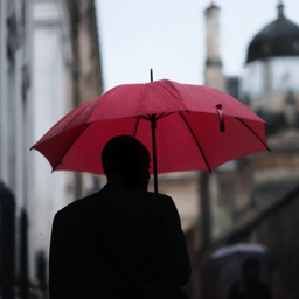

In [7]:
pic =load_img(FILE_1, target_size=(299,299))
display(pic)

In [8]:
pic_array = img_to_array(pic)
pic_array.shape

(299, 299, 3)

In [9]:
expanded = np.expand_dims(pic_array,axis=0)
expanded.shape

(1, 299, 299, 3)

In [10]:
preprocessed = preprocess_input(expanded)

In [11]:
def format_image_inceptionresnet(filename):
    pic = load_img(filename, target_size=(299,299))
    pic_arr = img_to_array(pic)
    expand = np.expand_dims(pic_arr, axis=0)
    return preprocess_input(expand)

In [12]:
def format_image_vgg19(filename):
    pic = load_img(filename, target_size=(224,224))
    pic_arr = img_to_array(pic)
    expand = np.expand_dims(pic_arr, axis=0)
    return preprocess_input_vgg19(expand)

## Load Inception Resnet

In [13]:
%%time
inception_model = InceptionResNetV2(weights='imagenet')

225214464/225209952 [==============================] - 1s 0us/step
CPU times: user 6.76 s, sys: 766 ms, total: 7.53 s
Wall time: 8.05 s


In [14]:
inception_model.graph = tf.compat.v1.get_default_graph()

## Making Predictions

In [15]:
prediction = inception_model.predict(preprocessed)
decode_predictions(prediction)

40960/35363 [==================================] - 0s 0us/step


[[('n04507155', 'umbrella', 0.82924366),
  ('n03792972', 'mountain_tent', 0.0012268272),
  ('n04479046', 'trench_coat', 0.0011062962),
  ('n03788195', 'mosque', 0.0010572362),
  ('n03220513', 'dome', 0.0010310994)]]

In [16]:
data = format_image_inceptionresnet(FILE_11)

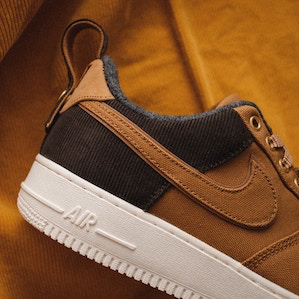

[[('n04133789', 'sandal', 0.28393158),
  ('n04120489', 'running_shoe', 0.20349677),
  ('n03680355', 'Loafer', 0.10018024),
  ('n04200800', 'shoe_shop', 0.062399276),
  ('n04026417', 'purse', 0.032476928)]]

In [17]:
prediction = inception_model.predict(data)
display(load_img(FILE_11))
decode_predictions(prediction)

## Testing the VGG 19 Model

In [18]:
vgg19_model = VGG19()

574717952/574710816 [==============================] - 3s 0us/step


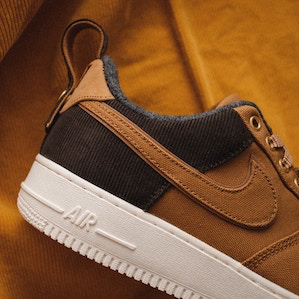

[[('n04133789', 'sandal', 0.3076619),
  ('n04026417', 'purse', 0.28260309),
  ('n03709823', 'mailbag', 0.092419766),
  ('n03908618', 'pencil_box', 0.06579644),
  ('n03680355', 'Loafer', 0.046173867)]]

In [19]:
data = format_image_vgg19(FILE_11)
prediction = vgg19_model.predict(data)
display(load_img(FILE_11))
decode_vgg19(prediction)